In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_csv('unicorns till sep 2022.csv')

data.shape

(1186, 7)

In [90]:
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [91]:
data.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [92]:
data['Id'] = range(1, len(data) + 1)
data

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Id
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",1
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",3
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",4
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",5
...,...,...,...,...,...,...,...,...
1181,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",1182
1182,FourKites,$1,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu...",1183
1183,VulcanForms,$1,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr...",1184
1184,SingleStore,$1,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective",1185


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
 7   Id              1186 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 74.3+ KB


In [94]:
data.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
Id                 0
dtype: int64

In [95]:
data.nunique()

Company           1183
Valuation ($B)     222
Date Joined        695
Country             48
City               286
Industry            34
Investors         1152
Id                1186
dtype: int64

In [96]:
data['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [97]:
data['Industry'].value_counts()

Industry
Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail            

In [98]:
data['Industry'].value_counts(normalize=True)

Industry
Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                     

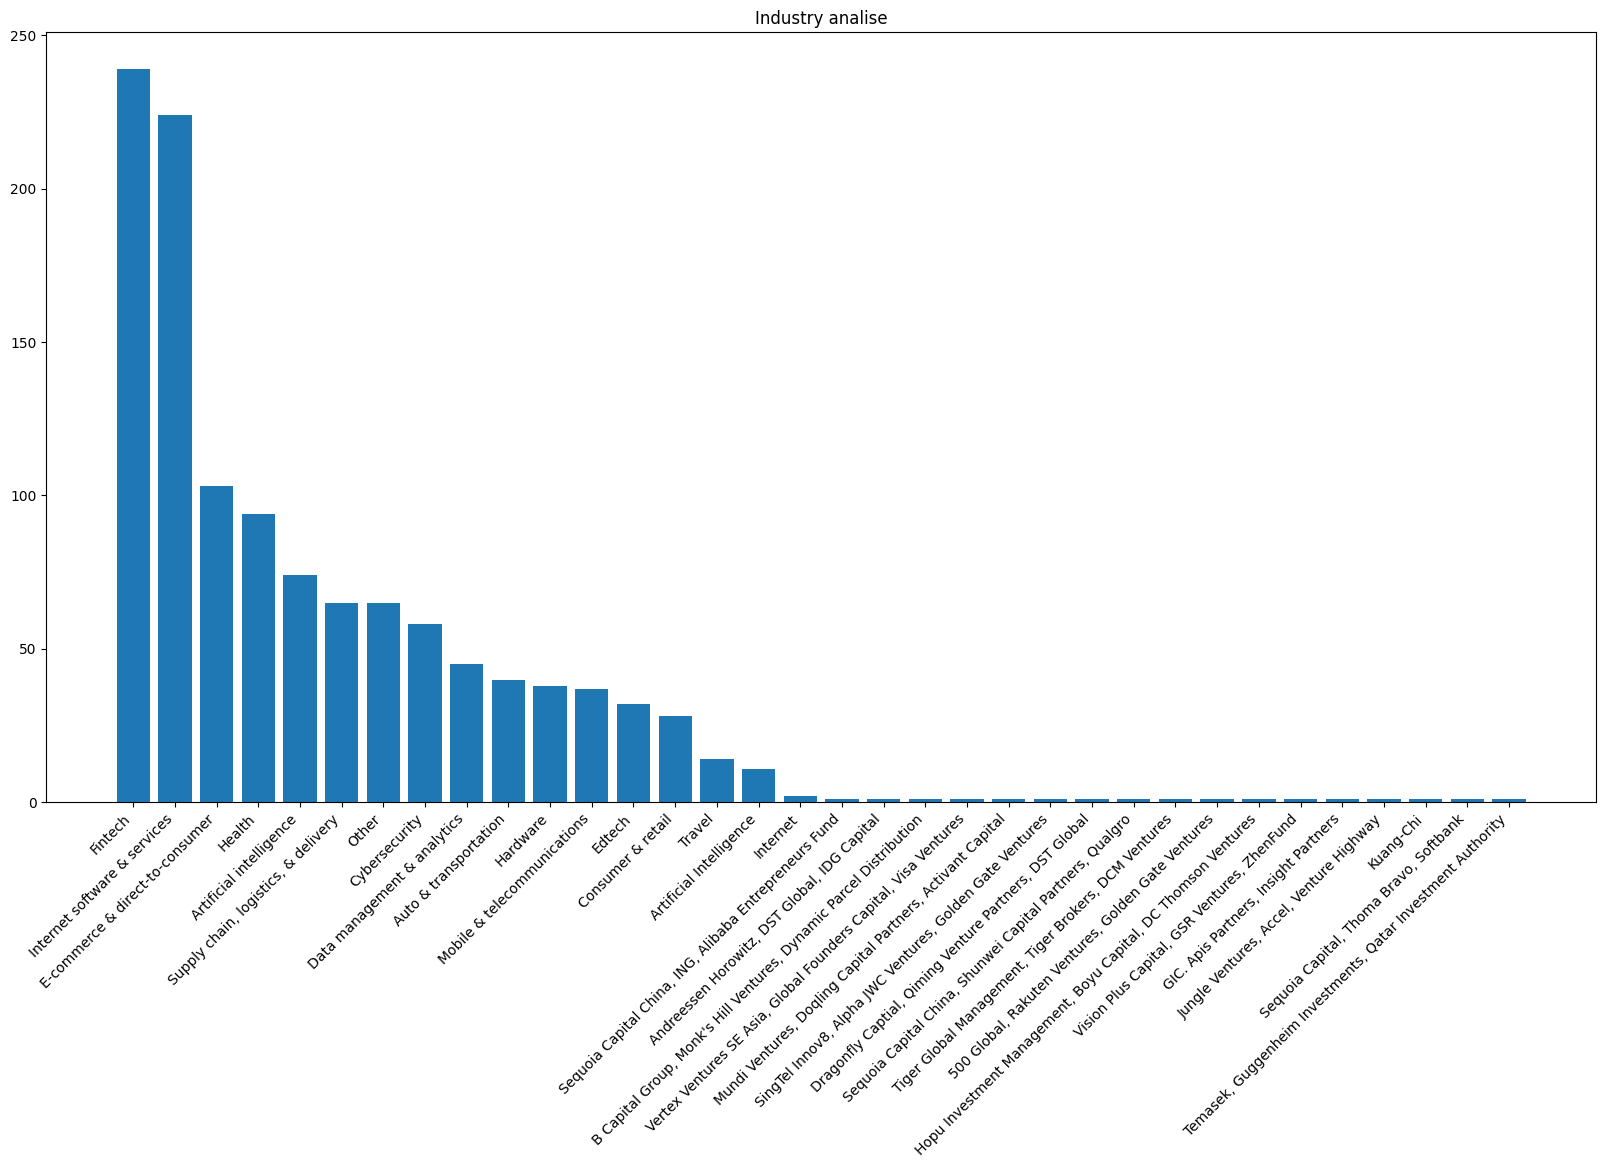

In [99]:
# Tipo de segmento que mais geram startups
plt.figure( figsize= (20,10))
plt.title('Industry analise')
plt.bar(data['Industry'].value_counts().index, data['Industry'].value_counts())
plt.xticks( rotation=45, ha='right');

In [100]:
Analise = round( data['Country'].value_counts(normalize=True) * 100, 1)

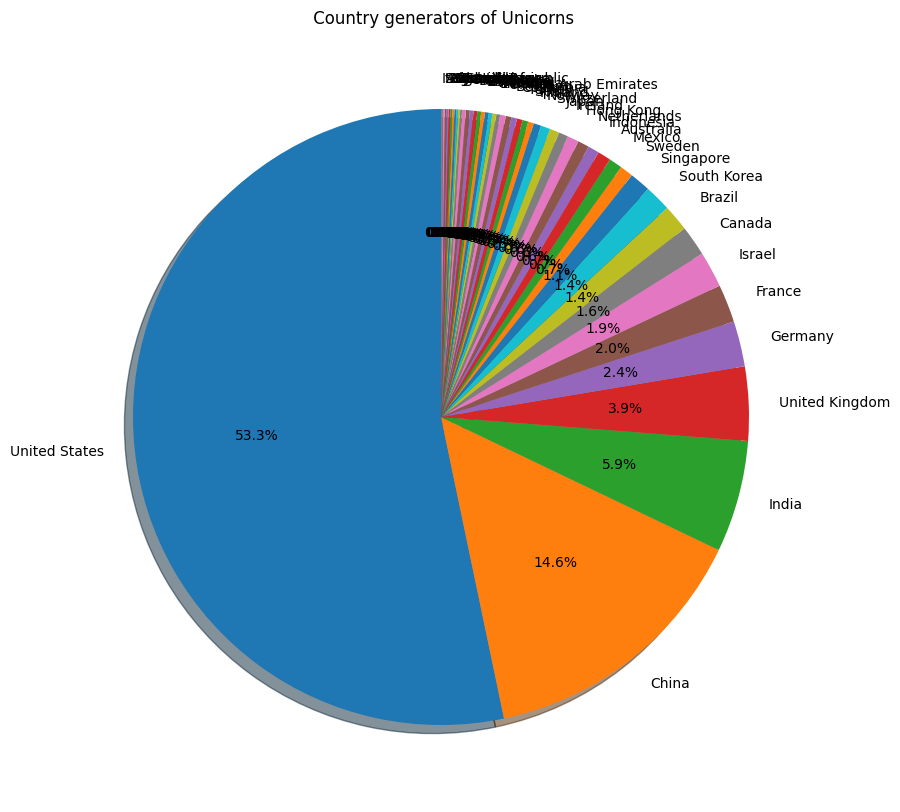

In [101]:
# Paises geradores de unicornios
plt.figure( figsize= (20,10))
plt.title(' Country generators of Unicorns')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

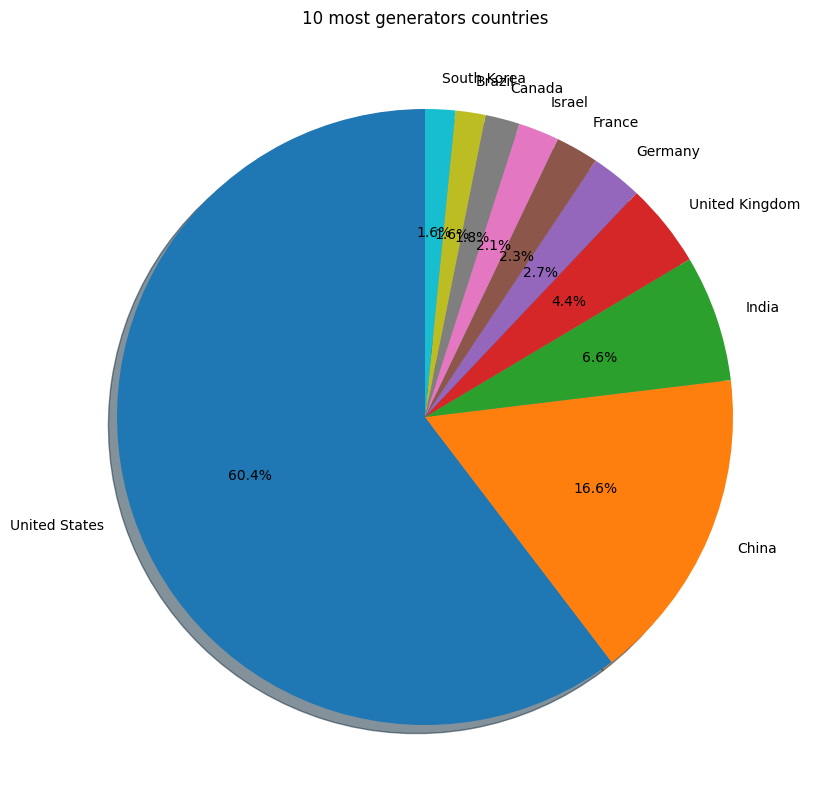

In [102]:
# Gráfico dos 10 paises com maior geração de Unicornios
plt.figure( figsize=(20,10) )
plt.title('10 most generators countries')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [103]:
# Conversão de objeto para data
data['Date Joined'] = pd.to_datetime(data['Date Joined'])
data['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [104]:
data['Month'] = pd.DatetimeIndex(data['Date Joined']).month
data['Year'] = pd.DatetimeIndex(data['Date Joined']).year

data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Id,Month,Year
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",1,4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2,12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",3,7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",4,1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",5,1,2018


In [105]:
#Tabela analitica
grouped_analise = data.groupby(by=['Country', 'Year', 'Month', 'Company']).count()['Id'].reset_index()

grouped_analise

,Country,Year,Month,Company,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
1181,United States,2022,8,Flow,1
1182,United States,2022,8,Incredible Health,1
1183,United States,2022,8,Orna Therapeutics,1
1184,Vietnam,2021,10,Sky Mavis,1


In [106]:
grouped_analise.loc[
    grouped_analise['Country'] == 'Brazil'
]


,Country,Year,Month,Company,Id
16,Brazil,2018,7,Movile,1
17,Brazil,2018,11,iFood,1
18,Brazil,2019,6,Loggi,1
19,Brazil,2019,9,QuintoAndar,1
20,Brazil,2019,10,EBANX,1
21,Brazil,2019,12,Wildlife Studios,1
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1


In [107]:
grouped_analise.loc[
    grouped_analise['Country'] == 'United States'
]

,Country,Year,Month,Company,Id
548,United States,2011,4,Vice Media,1
549,United States,2012,6,Fanatics,1
550,United States,2012,12,Avant,1
551,United States,2012,12,SpaceX,1
552,United States,2013,2,Mu Sigma,1
...,...,...,...,...,...
1179,United States,2022,7,Unstoppable Domains,1
1180,United States,2022,7,VulcanForms,1
1181,United States,2022,8,Flow,1
1182,United States,2022,8,Incredible Health,1


In [114]:
data.groupby(by=['Country', 'Industry'])['Valuation ($B)'].sum()

Country        Industry                           
Argentina      Fintech                                  2.45
Australia      E-commerce & direct-to-consumer          1.00
               Fintech                                  8.00
               Internet software & services            45.40
Austria        Edtech                                   3.50
                                                       ...  
United States  Other                                  228.26
               Supply chain, logistics, & delivery     99.62
               Travel                                   7.25
Vietnam        Fintech                                  2.27
               Internet software & services             3.00
Name: Valuation ($B), Length: 221, dtype: float64

In [108]:
grouped_analise.loc[
    grouped_analise['Country'] == 'China'
]

,Country,Year,Month,Company,Id
54,China,2014,10,Koudai,1
55,China,2015,1,Apus Group,1
56,China,2015,1,BeiBei,1
57,China,2015,1,DJI Innovations,1
58,China,2015,1,LinkSure Network,1
...,...,...,...,...,...
223,China,2022,4,Gokin Solar,1
224,China,2022,4,Greater Bay Technology,1
225,China,2022,4,ROX Motor,1
226,China,2022,6,Jaguar Microsystems,1


In [109]:
data['Valuation ($B)'] = pd.to_numeric(data['Valuation ($B)'].apply(lambda Linha: Linha.replace('$', '')))
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Id,Month,Year
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",1,4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2,12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",3,7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",4,1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",5,1,2018


In [110]:
countries = data.groupby(by=['Country'])['Valuation ($B)'].sum().reset_index()

countries.head()

,Country,Valuation ($B)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [111]:
values = countries.sort_values('Valuation ($B)', ascending=False)
values.head()

,Country,Valuation ($B)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


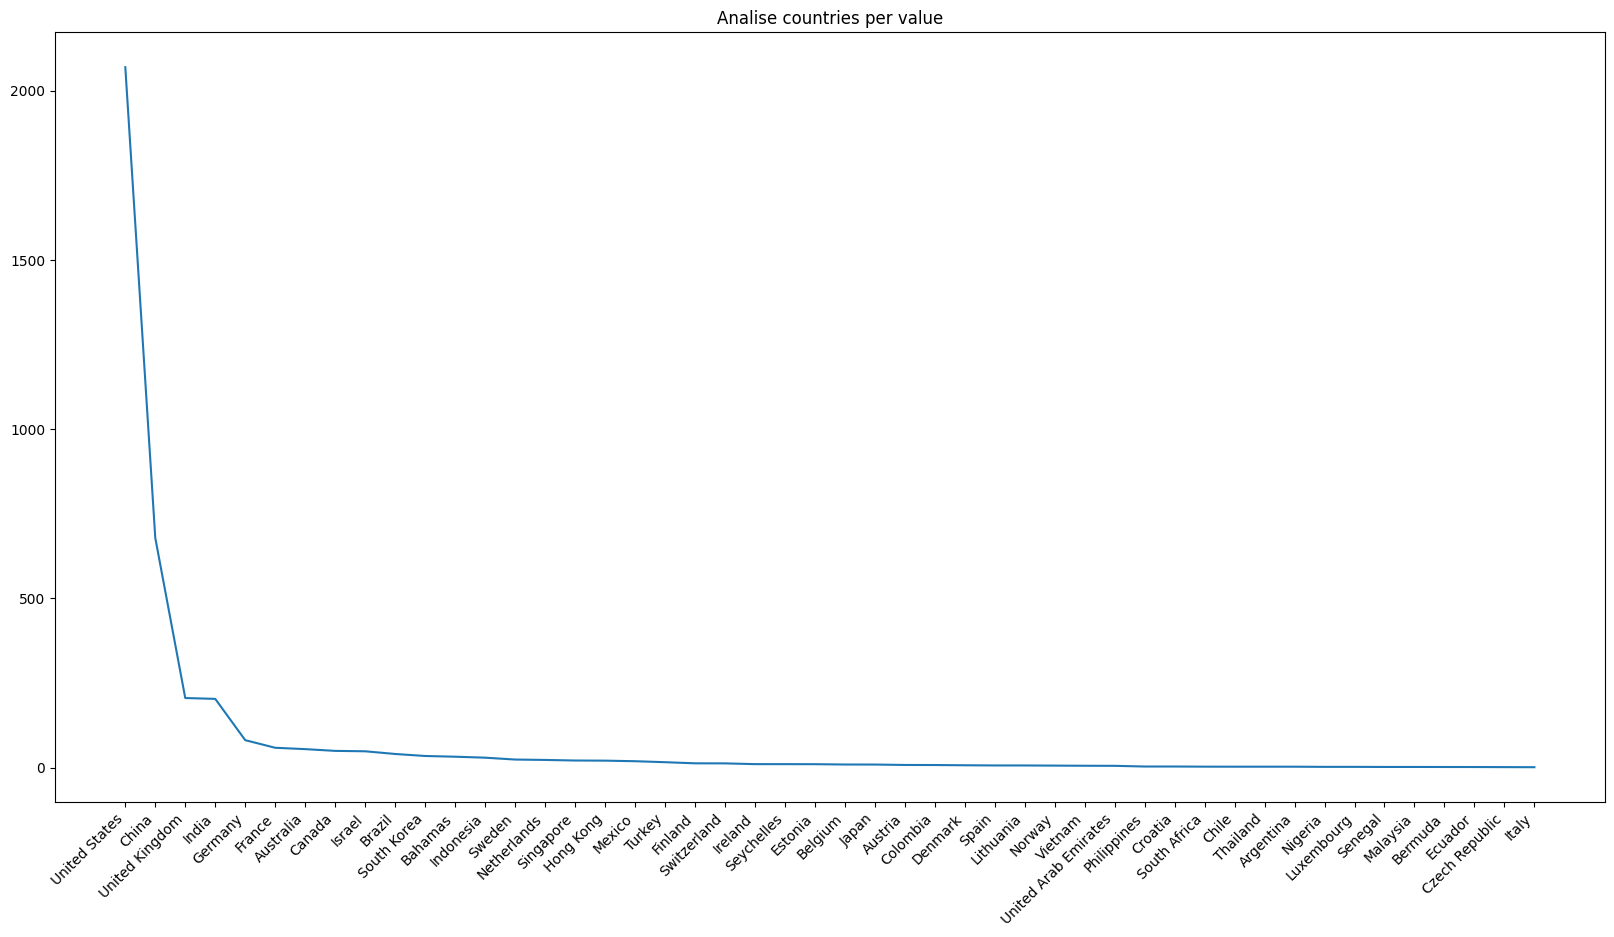

In [112]:
plt.figure( figsize=(20,10) )
plt.plot(values['Country'], values['Valuation ($B)'])
plt.title('Analise countries per value')
plt.xticks(rotation=45, ha='right');